# 강의안5  Pandas 기초

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.  Pandas 사용 사례

### 데이터프레임(DataFrame)의 소개

In [3]:
tips = sns.load_dataset("tips")     # seaborn 패키지에 내장된 tips 데이터 프레임 가저오기, #load는 업로드?
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.head() #df의 메소드

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
tips.info()       # info() 메소드는 데이터프레임 객체에 대한 정보를 제공한다.
#244개의 데이터, null이 없다, 각각의 타입 설명 및 메모리사이즈(크기)까지 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 데이터프레임을 이용한 탐색적 데이터 분석 (explorative data analysis)

In [7]:
tips["total_bill"].mean()    # total_bill 열의 자료에 대해서 평균값을 구함

19.785942622950824

In [8]:
tips.describe()     # 데이터프레임의 수치 데이터에 대한 기술통계량을 산출함
#'numeric data'에 대한 기술통계량 산출

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


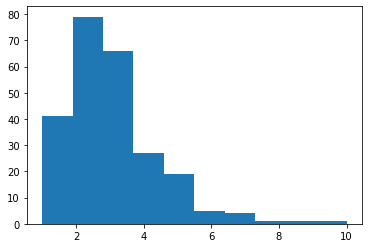

In [9]:
plt.hist(tips['tip'], bins=10)     # tip열의 자료에 대한 히스토그램을 그림 
plt.show()
# plt라는 모듈에 hist라는 함수로 #tips라는 df 내 tip 열을 가져옴

In [10]:
tips['sex'].value_counts()
#categorical data에서는 counts를 해주면 셀 수 있음

Male      157
Female     87
Name: sex, dtype: int64

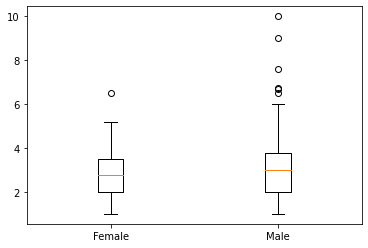

In [11]:
plt.boxplot([tips[tips['sex'] == 'Female']['tip'], #boolean selection, 성별에서 여자만 뽑아라
             tips[tips['sex'] == 'Male']['tip']],
             labels = ['Female', 'Male'])
plt.show()

In [12]:
tips.groupby('sex').tip.mean() #groupby : 열을 따로 뗴어내기 위한 함수

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [13]:
tips.groupby('sex').tip.std()

sex
Male      1.489102
Female    1.159495
Name: tip, dtype: float64

## 2. Pandas Series 데이터 객체

### Create a Series from a Python list

In [14]:
s1 = pd.Series([0.25, 0.5, 0.75, 1.0])    # 리스트로부터 pandas 시리즈 만들기
s1

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [15]:
type(s1)     # 데이터 유형을 확인하면 pandas의 series입을 확인할 수 있다.

pandas.core.series.Series

In [16]:
s1.values         # the values are simply a familiar Numpy array
#values(값)는 s1의 attributes(속성)이다.

array([0.25, 0.5 , 0.75, 1.  ])

In [17]:
type(s1.values)
#값은 ndarray로 출력된다(주의)

numpy.ndarray

In [18]:
s1.index    # 별도의 index를 지정하기 않아 0부터 순차적인 번호가 부여되어 있다.

RangeIndex(start=0, stop=4, step=1)

In [19]:
type(s1.index)

pandas.core.indexes.range.RangeIndex

In [20]:
s1[1]     # 시리즈의 데이터의 indexing

0.5

In [21]:
s1[1:3]     # 시리스 데이터 slicing

1    0.50
2    0.75
dtype: float64

시리즈에 index 매개변수를 이용하여 명시적으로 index를 부여함

In [22]:
s2 = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])    # explicitly define index
s2

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [23]:
s2['b']       # value is accessed by an explicit index

0.5

In [24]:
s2['b':'d']    # explicit label을 사용할 경우 slicing에서 end point가 포함됨

b    0.50
c    0.75
d    1.00
dtype: float64

### Create a Series from a Python dictionary

In [25]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)        # Series created from a python dictionary
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [26]:
population['California']

38332521

In [27]:
population['California':'New York']     # Series support the slicing operation with explicit indices (end-point가 포함된다)
#Explicit(명백한, 명시적인) 레이블을 이용하여 인덱싱과 슬라이싱을 진행할 경우 엔드포인트가 포함된다

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [28]:
population[0:2]     # implicit index를 이용할 수 있으나 end-point는 포함되지 않는다.

California    38332521
Texas         26448193
dtype: int64

### 시리즈의 기본적 조작 및 연산

In [29]:
s1

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [30]:
s1[0] = 0     # 시리즈는 immutable 이므로 값의 변경이 가능하다.
s1

0    0.00
1    0.50
2    0.75
3    1.00
dtype: float64

In [31]:
s1[0 : 2] = 0 #implicit한 숫자를 이용하였기에 end-point 포함되지 않는다 !! 0과 1의 value만 0으로 변경 !!
s1

0    0.00
1    0.00
2    0.75
3    1.00
dtype: float64

In [32]:
s1 = pd.Series(range(5))
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [33]:
s2 = pd.Series(range(5,10))
s2

0    5
1    6
2    7
3    8
4    9
dtype: int64

In [34]:
s1 + s2

0     5
1     7
2     9
3    11
4    13
dtype: int64

In [35]:
s1.append(s2)     # 매개변수에 시리즈가 입력됨, 그냥 붙어버림(default = False)

C:\Users\qwer1\AppData\Local\Temp\ipykernel_7872\2138816776.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1.append(s2)     # 매개변수에 시리즈가 입력됨, 그냥 붙어버림(default = False)


0    0
1    1
2    2
3    3
4    4
0    5
1    6
2    7
3    8
4    9
dtype: int64

In [36]:
s1.append(s2, ignore_index = True) # True로 하면 index가 연결된다.

C:\Users\qwer1\AppData\Local\Temp\ipykernel_7872\3709226564.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1.append(s2, ignore_index = True) # True로 하면 index가 연결된다.


0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [37]:
s1         # append() 메서드는 view를 보여줄 뿐, 값을 변경시키지 않는다.

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [38]:
s2.drop(4)     # 매개변수에 index를 입력

0    5
1    6
2    7
3    8
dtype: int64

In [39]:
s2     

0    5
1    6
2    7
3    8
4    9
dtype: int64

In [40]:
s2 = s2.drop(4)
s2

0    5
1    6
2    7
3    8
dtype: int64

In [41]:
s2

0    5
1    6
2    7
3    8
dtype: int64

In [42]:
s2 = pd.Series(range(5,10))
s2

0    5
1    6
2    7
3    8
4    9
dtype: int64

In [43]:
s2.drop(8)   # index가 존재하지 않으면 에러가 발생함

KeyError: '[8] not found in axis'

In [ ]:
s2.drop([1, 2])

In [ ]:
s2

In [ ]:
s2.drop([1,2], inplace = True) #True로 해줘야 변한다 !

In [ ]:
s2

In [ ]:
s3 = pd.Series(range(5,10), index = (4,3,2,1,0))
s3

In [ ]:
s1 + s3

In [ ]:
s4 = pd.Series(range(5,9))
s4

In [ ]:
s1 + s4

In [ ]:
s1 + 2

In [ ]:
s1 * 2

In [ ]:
s1 * s2 #S1에는 1,2가 없는데 S2에는 있다 => 에러가 아니라 NAN이 나온다 => 실무에서는 NaN이 오지게 많이나온다 !

In [ ]:
s1 * s4

In [ ]:
s1.mean()

In [ ]:
s1.std()

In [ ]:
s1.min()

In [ ]:
s1.max()

## 3. Pandas DataFrame 데이터 객체

### DataFrame 데이터 객체 특성

In [44]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [45]:
tips.info() #Colunm의 설명은 매우 중요하다. 처음에 시작할 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [47]:
tips.index #tips의 속성 (0~243)

RangeIndex(start=0, stop=244, step=1)

In [48]:
tips.columns #opject = string, category = 갯수가 정해져 있음, 메모리를 적게 차지함

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [51]:
tips.head() #함수, 상위 5개

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
tips.values 

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [52]:
type(tips.values)#numpy로 데이터가 넘어온 것 확인

numpy.ndarray

###  DataFrame 데이터 객체의 생성

#### dictionary를 이용한 DataFrame의 생성

In [56]:
population = [423967, 695662, 141297, 170312,149995]
area = [38332521, 26448193, 19651127, 19552860, 12882135]
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']

dict = {'population': population, 'area': area}     # 관련된 딕셔너리를 생성함
df = pd.DataFrame(dict)      # 행 index가 지정되지 않은 경우 형 label은 일련번호로 지정된다. pd.Serise
df

,population,area
0,423967,38332521
1,695662,26448193
2,141297,19651127
3,170312,19552860
4,149995,12882135


In [57]:
df = pd.DataFrame(dict, index=states)   # index 매개변수를 이용하여 명시적으로 행 label을 지정한 경우
df

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [58]:
df.index #행 정보

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [59]:
type(df.index)

pandas.core.indexes.base.Index

In [60]:
df.columns

Index(['population', 'area'], dtype='object')

In [61]:
df.values

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]], dtype=int64)

In [62]:
df.items

<bound method DataFrame.items of             population      area
California      423967  38332521
Texas           695662  26448193
New York        141297  19651127
Florida         170312  19552860
Illinois        149995  12882135>

In [63]:
df.population

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: population, dtype: int64

#### 리스트에서 DataFrame 데이터 객체 생성하기

In [64]:
L = [ [423967, 38332521],
      [695662, 26448193],
      [141297, 19651127],
      [170312, 19552860],
      [149995, 12882135] ]
df  = pd.DataFrame(L)      # 리스트에서 데이터프레임을 생성 pd.Serise
df #Index, Coulumn설정 x -> 숫자로 표현된다.

,0,1
0,423967,38332521
1,695662,26448193
2,141297,19651127
3,170312,19552860
4,149995,12882135


In [65]:
df = pd.DataFrame(L, columns = ['population', 'area'], index = states)   # 열과 행에 각각 label을 명시적으로 지정함
df

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### 2차원 Numpy array에서 DataFrame 데이터 객체 생성하기

In [66]:
arr = np.array(L)     # 리스트에서 numpy array를 생성함
arr

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]])

In [67]:
df = pd.DataFrame(arr, columns = ['population', 'area'], index = states )
df

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### 동일한 index의 Series를 사용한 데이터프레임 생성

In [78]:
s_population = pd.Series(arr[:,0], index=states)
s_population

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int32

In [79]:
s_area = pd.Series(arr[:,1], index=states)
s_area

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int32

In [80]:
df_states = pd.DataFrame({'population': s_population, 'area': s_area})
df_states

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [81]:
type(df_states)

pandas.core.frame.DataFrame

### Create a DataFrame by reading a file 

In [69]:
df_sci = pd.read_csv('C:\\Users\\qwer1\\Documents\\data\\scientists.csv') #'\' 하나로 인식이 안되는 경우 경로 사이사이에 \\로 변경 후 적용
df_sci #경로설정을 안한다? -> 작동하고 있는 파일에 해당 csv 파일이 있을 경우

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [70]:
df_sci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


## 4. DataFrame Indexing and Selection

### 데이터프레임의 열단위 데이터 추출하기

In [71]:
df_sci['Name']     # 열이름을 지정하여 열을 추출함. 하나의 열인 경우는 시리즈로 반환됨 -> 해당 방식 추천

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [72]:
df_sci.Name      # 객체명.변수명의 방식으로 추출할 수도 있다. 하지만 속성과 구분이 되지 않는 문제점이 존재한다

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [73]:
df_sci[['Name', 'Occupation']]    # 두개 이상의 열인 경우는 데이터프레임으로 반환됨

,Name,Occupation
0,Rosaline Franklin,Chemist
1,William Gosset,Statistician
2,Florence Nightingale,Nurse
3,Marie Curie,Chemist
4,Rachel Carson,Biologist
5,John Snow,Physician
6,Alan Turing,Computer Scientist
7,Johann Gauss,Mathematician


### 데이터프레임의 행단위 데이터 추출하기

In [75]:
#df_sci[0,:]     # Numpy와 같이 행과 열을 콤머(,) 구분하여 행을 추출할 수 없다.

In [119]:
df_sci[0:7]

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist


#### loc 속성을 이용하여 행에 명시적으로 label이 지정된 경우

In [120]:
df_states.loc['California']     # loc 속성을 이용하여 명시적 index 이름으로 행단위 데이터 추출 Series

population      423967
area          38332521
Name: California, dtype: int32

In [121]:
df_states.loc[['California', 'New York']]   # 여러개의 행을 추출하는 경우 DataFrame

,population,area
California,423967,38332521
New York,141297,19651127


In [84]:
df_states.loc['California': 'New York']    # silicing을 이용하며 부분을 추출함 + 마지막 포함된다.

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


#### iloc 속성을 이용하여 implicit 하게 숫자로 지정하는 경우

In [122]:
df_states.iloc[0]      # iloc 속성을 이용하여 암묵적인 순서를 이용하여 행단위 데이터 추출

population      423967
area          38332521
Name: California, dtype: int32

In [86]:
df_states.iloc[[0,3]] #Indexing을 했으나 마지막 번호가 exclude된다. (84번과 비교할 것)

,population,area
California,423967,38332521
Florida,170312,19552860


In [123]:
df_states.iloc[0:2]   # iloc 속성을 이용하여 암묵적 순서의 slicing으로 행단위 데이터 추출 (end-point는 포함하지 않는다)

,population,area
California,423967,38332521
Texas,695662,26448193


#### 행에 명시적으로label을 지정하지 않은 경우 loc, iloc 속성의 작동


In [124]:
df_sci.iloc[0]

Name          Rosaline Franklin
Born                 1920-07-25
Died                 1958-04-16
Age                          37
Occupation              Chemist
Name: 0, dtype: object

In [92]:
df_sci.loc[0] #행에 명시적으로 label을 지정하지 않았기 때문에 0부터 시작하는 Index가 적용된다.

Name          Rosaline Franklin
Born                 1920-07-25
Died                 1958-04-16
Age                          37
Occupation              Chemist
Name: 0, dtype: object

In [125]:
df_sci.iloc[0:3]    # index가 명시적으로 지정되지 않은 경우는 iloc속성으로 행자료 추출

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [126]:
df_sci.loc[0:3]    # 명시적으로 표시하는 loc속성을 이용하면 end-point가 포합된다.

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [95]:
df_sci.iloc[[0,2,5]]    # 연속되지 않은 행을 추출하기 위해서는 리스트로 전달함

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
5,John Snow,1813-03-15,1858-06-16,45,Physician


In [96]:
df_sci.iloc[-1]

Name           Johann Gauss
Born             1777-04-30
Died             1855-02-23
Age                      77
Occupation    Mathematician
Name: 7, dtype: object

In [97]:
# df_sci.loc[-1]     # loc 속성에서는 -1이 허용되지 않는다. explict한 데이터이기 때문

### 데이터프레임의 행과 열을 모두 지정하여 데이터 추출하기

In [98]:
df_states.loc['California', 'area']     # 행과 열을 모두 지정하여 데이터 추출하기 [행,열]

38332521

In [99]:
df_states.loc['California':'New York', 'area']   

California    38332521
Texas         26448193
New York      19651127
Name: area, dtype: int32

In [100]:
df_states.loc[['California', 'New York', 'Illinois'], :]

,population,area
California,423967,38332521
New York,141297,19651127
Illinois,149995,12882135


In [101]:
df_sci.loc[0:3, ['Name', 'Occupation']]

,Name,Occupation
0,Rosaline Franklin,Chemist
1,William Gosset,Statistician
2,Florence Nightingale,Nurse
3,Marie Curie,Chemist


In [102]:
# df_sci.iloc[0:3, ['Name', 'Occupation']] # 암묵적으로 정해진 숫자를 사용하므로 보이는 문자열 사용 불가

In [103]:
df_sci.iloc[0:3, [0, 4]] #iloc는 숫자만!

,Name,Occupation
0,Rosaline Franklin,Chemist
1,William Gosset,Statistician
2,Florence Nightingale,Nurse


In [108]:
df_sci.iloc[0:4, [0,4]] #첫 번째, 다섯 번째 열 추출

,Name,Occupation
0,Rosaline Franklin,Chemist
1,William Gosset,Statistician
2,Florence Nightingale,Nurse
3,Marie Curie,Chemist


### Filtering: 논리값 (boolean)을 이용한 행 추출하기 

In [109]:
df_states['population']> 200000 #하나의 조건

California     True
Texas          True
New York      False
Florida       False
Illinois      False
Name: population, dtype: bool

In [118]:
df_states[(df_states['population'] > 200000) & (df_states['area']>30000000)]     # boolean selection

,population,area
California,423967,38332521


In [113]:
df_sci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [114]:
df_sci[df_sci['Age'] > df_sci['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [115]:
df_sci['Age'].mean()

59.125

In [116]:
df_sci['Age'] > df_sci['Age'].mean()

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

## 5. DataFrame의 데이터 기본적 조작

In [127]:
data = {'state' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2003, 2003],
         'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2003,2.9
5,Nevada,2003,3.2


### DataFrame 변경하기

In [128]:
frame.loc[0 , 'pop'] = 99 #0행, 'pop'열에 해당하는 값 변경
frame

,state,year,pop
0,Ohio,2000,99.0
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2003,2.9
5,Nevada,2003,3.2


In [129]:
frame['pop'] = 11 #'pop'열 전체 값 변경
frame

,state,year,pop
0,Ohio,2000,11
1,Ohio,2001,11
2,Ohio,2002,11
3,Nevada,2001,11
4,Nevada,2003,11
5,Nevada,2003,11


In [132]:
frame[['pop', 'year', 'state']] #열 순서 변경

,pop,year,state
0,11,2000,Ohio
1,11,2001,Ohio
2,11,2002,Ohio
3,11,2001,Nevada
4,11,2003,Nevada
5,11,2003,Nevada


In [133]:
pd.DataFrame(frame, columns = ['year', 'state', 'pop']) #열 순서 변경

,year,state,pop
0,2000,Ohio,11
1,2001,Ohio,11
2,2002,Ohio,11
3,2001,Nevada,11
4,2003,Nevada,11
5,2003,Nevada,11


### 열 추가 및 삭제하기

In [134]:
frame['debt'] = 50 #모든 값이 50인 새 'debt'열 생성
frame

,state,year,pop,debt
0,Ohio,2000,11,50
1,Ohio,2001,11,50
2,Ohio,2002,11,50
3,Nevada,2001,11,50
4,Nevada,2003,11,50
5,Nevada,2003,11,50


In [136]:
frame2 = pd.DataFrame(data, columns = ['state', 'year', 'pop', 'debt'], 
                       index = ['one', 'two', 'three', 'four', 'five', 'six'])
frame2 #data 127번째에 있음(dictionary)

,state,year,pop,debt
one,Ohio,2000,1.5,NaN
two,Ohio,2001,1.7,NaN
three,Ohio,2002,3.6,NaN
four,Nevada,2001,2.4,NaN
five,Nevada,2003,2.9,NaN
six,Nevada,2003,3.2,NaN


In [137]:
frame2['debt'] = 100
frame2

,state,year,pop,debt
one,Ohio,2000,1.5,100
two,Ohio,2001,1.7,100
three,Ohio,2002,3.6,100
four,Nevada,2001,2.4,100
five,Nevada,2003,2.9,100
six,Nevada,2003,3.2,100


In [138]:
frame2.drop(["pop"], axis=1)

,state,year,debt
one,Ohio,2000,100
two,Ohio,2001,100
three,Ohio,2002,100
four,Nevada,2001,100
five,Nevada,2003,100
six,Nevada,2003,100


In [139]:
frame2

,state,year,pop,debt
one,Ohio,2000,1.5,100
two,Ohio,2001,1.7,100
three,Ohio,2002,3.6,100
four,Nevada,2001,2.4,100
five,Nevada,2003,2.9,100
six,Nevada,2003,3.2,100


In [140]:
frame2.drop(['debt', 'pop'], axis = 1, inplace = True) #inplace -> 데이터 자체 변경

In [141]:
frame2

,state,year
one,Ohio,2000
two,Ohio,2001
three,Ohio,2002
four,Nevada,2001
five,Nevada,2003
six,Nevada,2003


In [145]:
frame2.drop(['one'], axis = 0) #axis = 0 추가해도 같은 결과가 나옴 = 아무것도 표기하지 않을 때 행이 삭제됨
#계산할 때는 0이 행, 1이 열

,state,year
two,Ohio,2001
three,Ohio,2002
four,Nevada,2001
five,Nevada,2003
six,Nevada,2003


## 6. 데이터프레임 기술통계량 산출

In [146]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                index = ['a', 'b', 'c', 'd'], columns = ['one', 'two'])
df #'NaN': Missing Data / N/A: Missing data in numpy

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [147]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [148]:
df.sum(axis = 1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [149]:
df.mean(axis = 'columns', skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
ages = df_sci["Age"]
ages

In [ ]:
type(ages)

In [ ]:
ages.mean()

In [ ]:
ages.std()

In [ ]:
ages.max()

In [ ]:
ages.describe()

In [ ]:
ages + 100     # 사칙연산이 가능함

In [ ]:
df_sci.describe()

In [ ]:
df.describe()

### 그룹 연산

In [150]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [151]:
tips.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [152]:
tips.groupby('sex')

In [154]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [155]:
tips.groupby('sex').std()

,total_bill,tip,size
sex,,,
Male,9.246469,1.489102,0.955997
Female,8.009209,1.159495,0.937644


In [153]:
tips[tips['day']=='Sun'].groupby('sex').mean() #다변량분석

,total_bill,tip,size
sex,,,
Male,21.887241,3.220345,2.810345
Female,19.872222,3.367222,2.944444


In [156]:
tips.groupby(['sex','day']).mean()

total_bill       tip      size
sex    day                                 
Male   Thur   18.714667  2.980333  2.433333
       Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
Female Thur   16.715312  2.575625  2.468750
       Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444